Author: Mayuri Vagh

Data Science & Business Analytics intern at The Sparks Foundation.

TASK 3 - Exploratory Data Analysis - Retail Store


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Take file from google dreive so we have to acces the file
from google.colab import files
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df = pd.read_csv('/content/drive/MyDrive/MY_Learning/SampleSuperstore.csv', index_col=0)
df

,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Mode,,,,,,,,,,,,
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


In [21]:
print('Total no. of null values = ', df.isnull().sum().sum())

Total no. of null values =  0


In [24]:
df.columns

Index(['Segment', 'Country', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9958 entries, Second Class to Second Class
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9958 non-null   object 
 1   Country       9958 non-null   object 
 2   City          9958 non-null   object 
 3   State         9958 non-null   object 
 4   Region        9958 non-null   object 
 5   Category      9958 non-null   object 
 6   Sub-Category  9958 non-null   object 
 7   Sales         9958 non-null   float64
 8   Quantity      9958 non-null   int64  
 9   Discount      9958 non-null   float64
 10  Profit        9958 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB


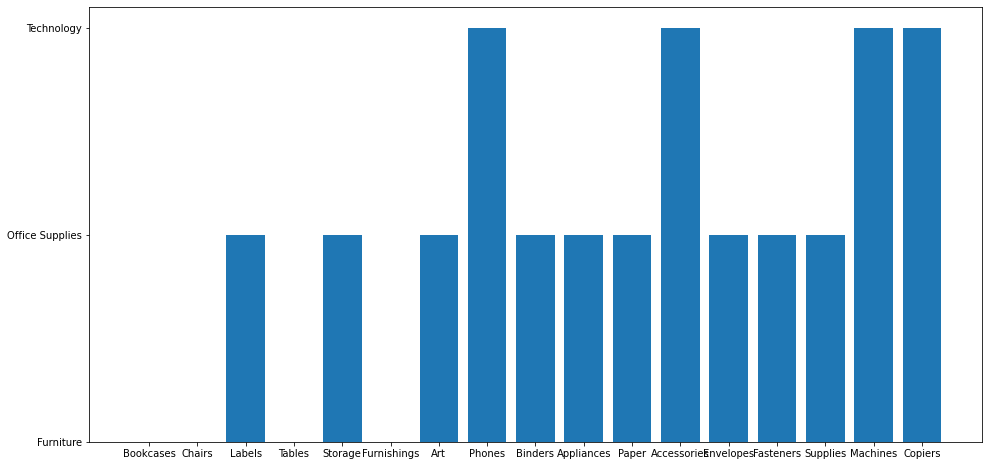

In [26]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df)
plt.show()

In [27]:
print(df['State'].value_counts())

California              1989
New York                1123
Texas                    982
Pennsylvania             584
Washington               501
Illinois                 490
Ohio                     467
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 223
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 138
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

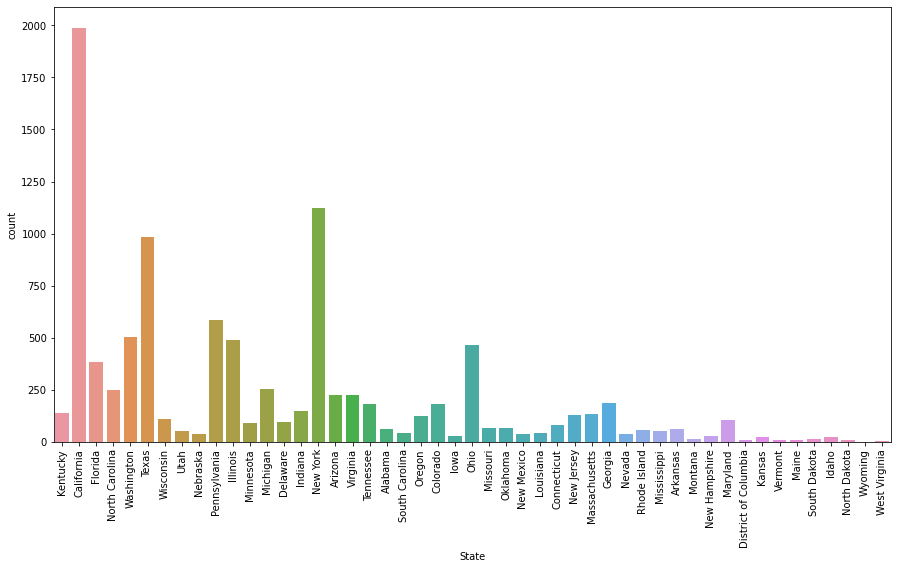

In [28]:
import seaborn as sns

plt.figure(figsize = (15,8))
sns.countplot(x = df['State'])
plt.xticks(rotation = 90)
plt.show()

In [29]:
print(df['Sub-Category'].value_counts())

Binders        1521
Paper          1350
Furnishings     955
Phones          888
Storage         844
Art             793
Accessories     774
Chairs          615
Appliances      466
Labels          362
Tables          319
Envelopes       254
Bookcases       228
Fasteners       216
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


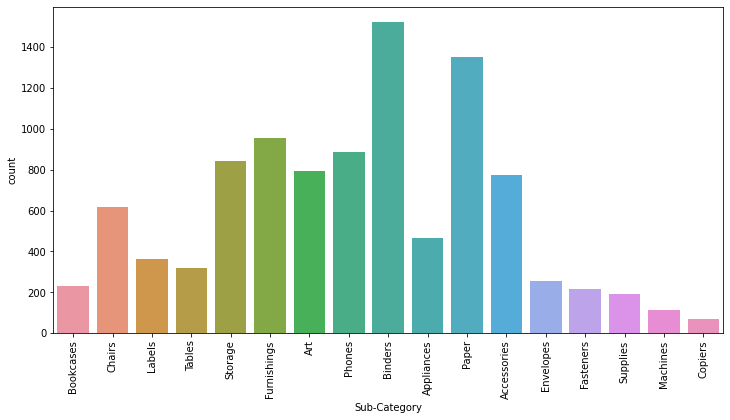

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

In [31]:
 # Correlation of dataset
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200554,-0.028585,0.479066
Quantity,0.200554,1.000000,0.008354,0.066154
Discount,-0.028585,0.008354,1.000000,-0.219825
Profit,0.479066,0.066154,-0.219825,1.000000


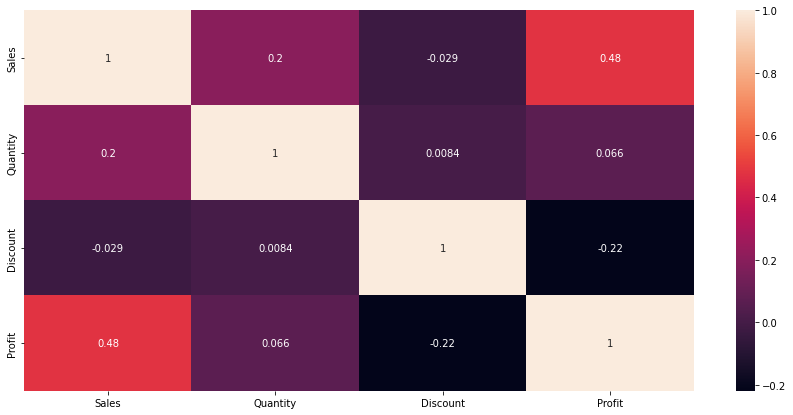

In [33]:
# Heatmap to check the collinearity between sales, quantity, discount and profit
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True)
plt.show()

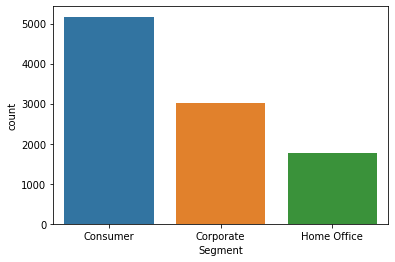

In [34]:
sns.countplot(x=df['Segment'])

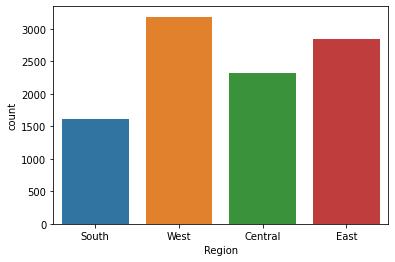

In [35]:
sns.countplot(x=df['Region'])

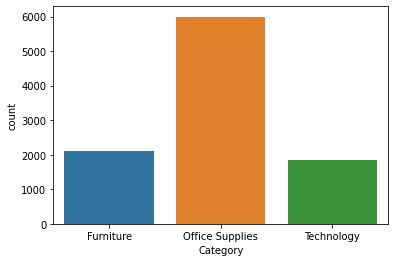

In [36]:
sns.countplot(x=df['Category'], data=df)

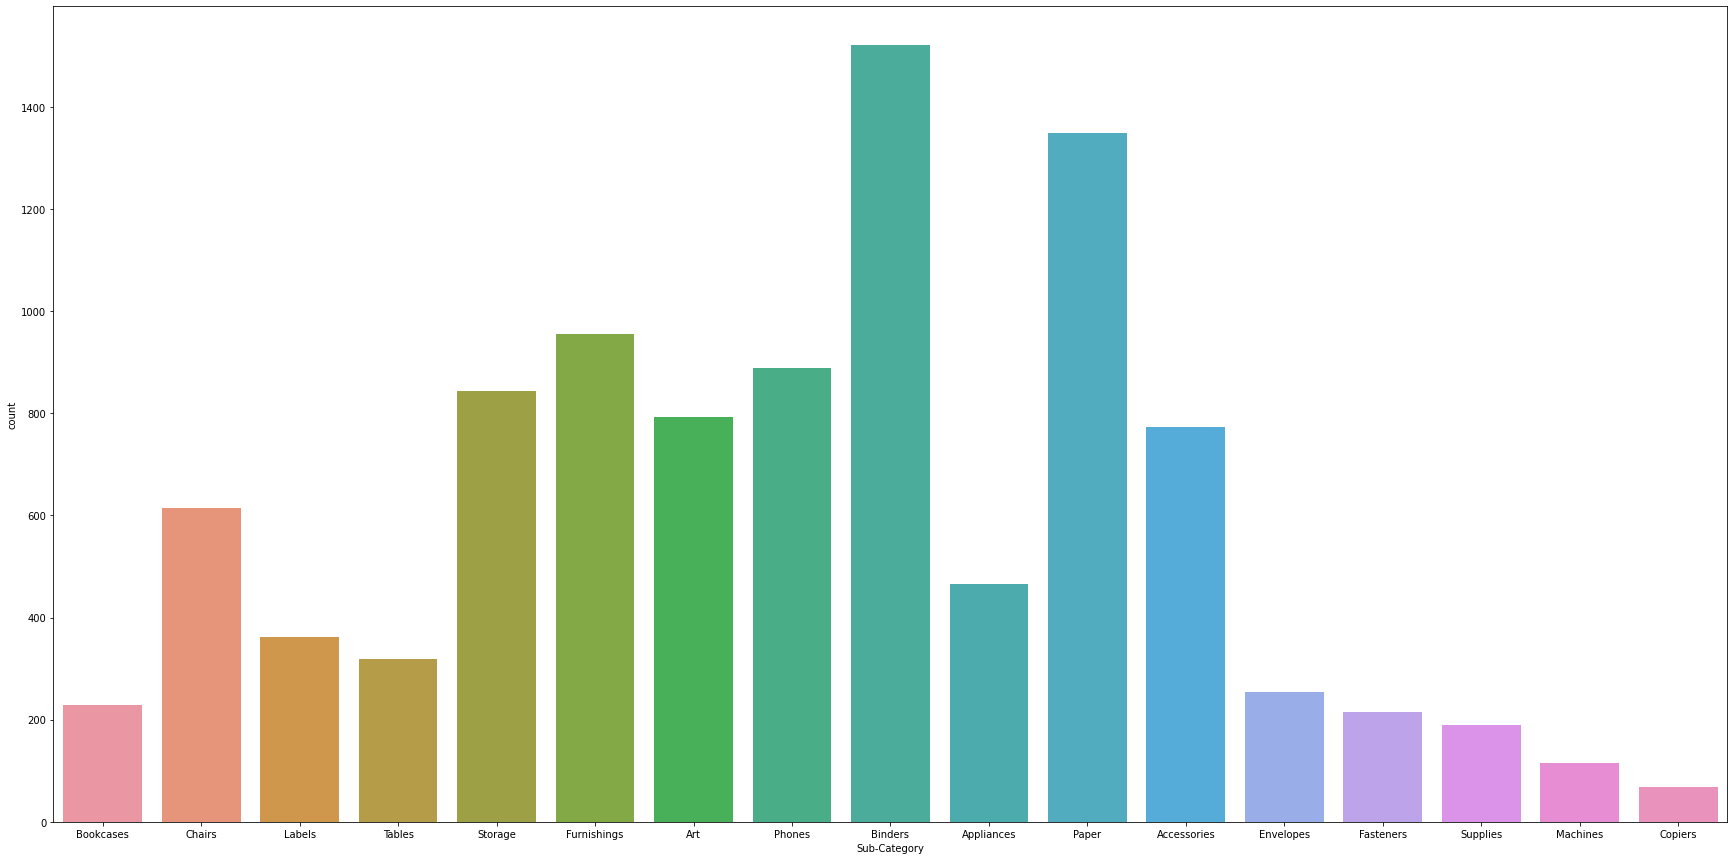

In [37]:
plt.figure(figsize=(30,15))
sns.countplot(x=df['Sub-Category'], data=df)

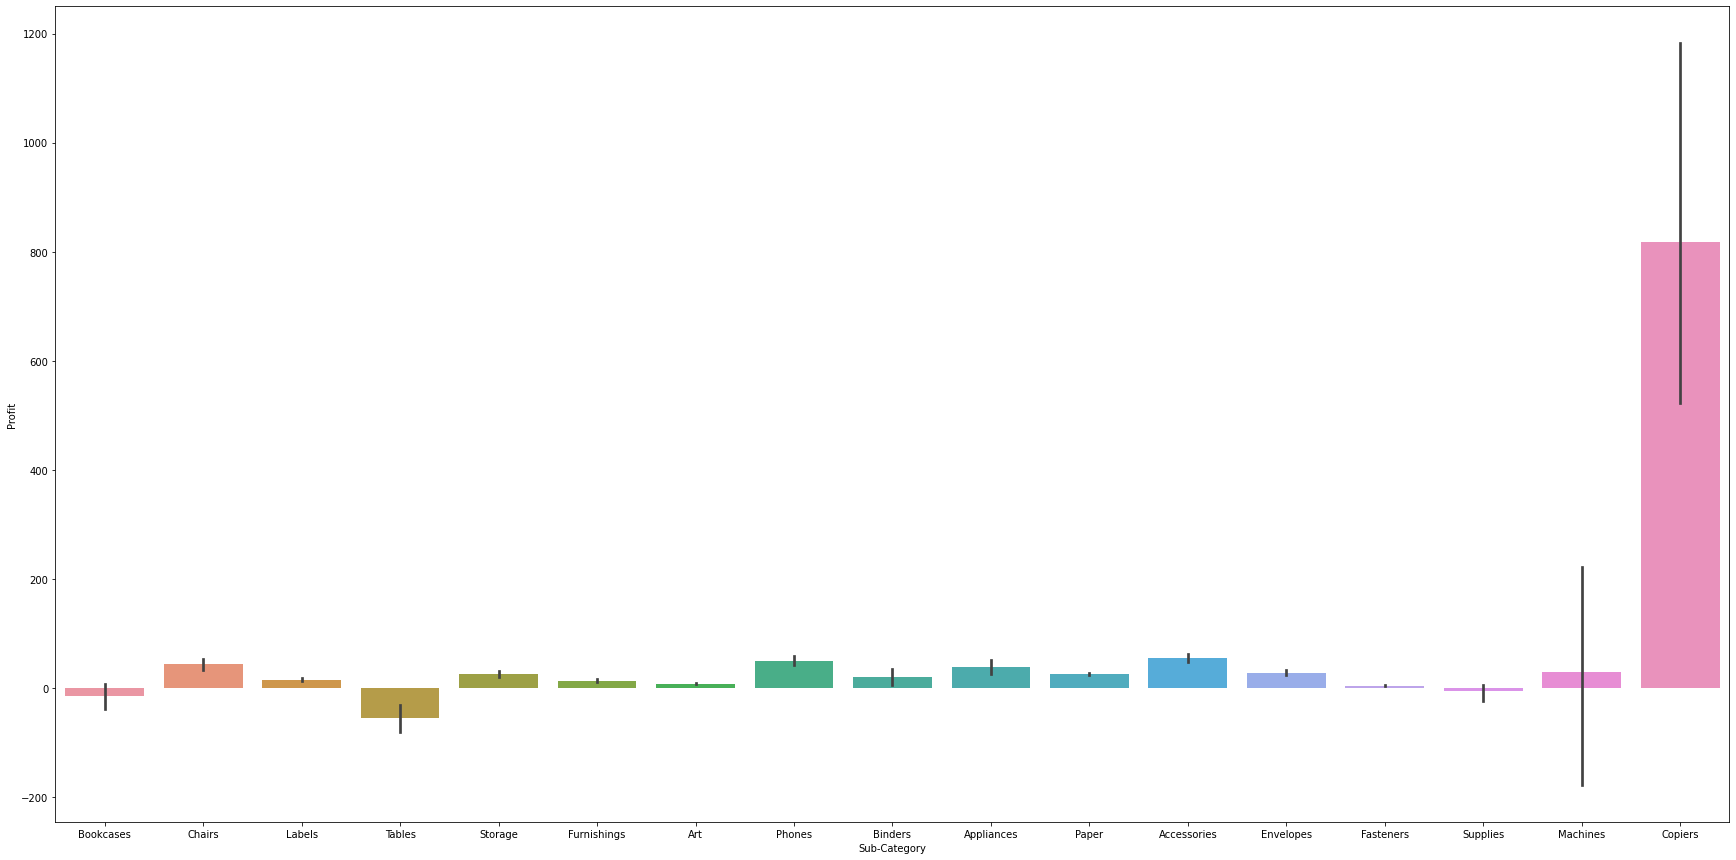

In [38]:
plt.figure(figsize=(30,15))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])

In [7]:
D=pd.DataFrame(df.groupby(['Category'])['Profit'].sum()).reset_index()
D

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


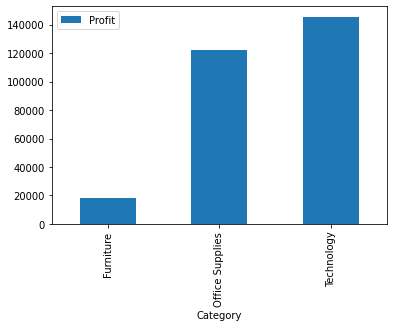

In [8]:
d=D.plot(kind='bar', x='Category')

In [10]:
pd.DataFrame(df['Profit'].describe())

,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


In [12]:
max_profit = pd.DataFrame(df.groupby(["City"])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False).head(10)
max_profit

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [13]:
min_profit = pd.DataFrame(df.groupby(["City"])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False).tail(10)
min_profit

,City,Profit
216,Jacksonville,-2323.8350
24,Aurora,-2691.7386
375,Phoenix,-2790.8832
109,Dallas,-2846.5257
60,Burlington,-3622.8772
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485
374,Philadelphia,-13837.7674
